## Why sentiment analysis? And why Amazon reviews
<p>Sentiment analysis on Amazon reviews can be crucial for a company's profits because it allows the company to gain insight into how their products are perceived by customers. This information can be used to improve the products and make changes that will increase customer satisfaction and lead to increased sales. By understanding the sentiments expressed in customer reviews, a company can also identify common issues and address them, improving the overall customer experience and increasing the likelihood of repeat purchases. Additionally, positive reviews can be used as marketing material to attract new customers, while negative reviews can be addressed and resolved to prevent potential customers from being turned off by the company. Overall, sentiment analysis on Amazon reviews can be a valuable tool for companies looking to improve their profits.</p>

### Tools used in this project:
<p>Anaconda, Python, Scikit-Learn, Matplotlib, Seaborn</p>

### What is NLP and sentiment analysis?
<p>Natural Language Processing (NLP) is a field of artificial intelligence that deals with how computers and humans communicate with each other. It uses various algorithms and techniques to analyze and understand natural language text or speech.

Sentiment analysis is a sub-field of NLP that focuses on identifying and extracting subjective information from text. This information can be positive, negative, or neutral and is often used to measure the sentiment of a piece of text. Sentiment analysis is commonly used in a variety of applications, such as social media analysis, customer service, and market research. It can be used to identify the overall sentiment of a large group of people, as well as to analyze the sentiment of individual pieces of text.

Understanding NLP and sentiment analysis can be valuable for gaining insight into how customers perceive your products and services. This information can be used to improve customer satisfaction and increase sales. By analyzing customer reviews and other forms of online feedback, you can identify common issues and take steps to address them. This can help improve the overall customer experience and increase the likelihood of repeat purchases. Additionally, positive reviews and feedback can be used as marketing material to attract new customers, while negative reviews can be addressed and resolved to prevent potential customers from being turned off by the company. Overall, NLP and sentiment analysis can be valuable tools for improving your company's profits.</p>

### Import libraries and datasets

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#allows me to see my data vis more clearly since I am running a dark theme.
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [53]:
#load the data
twitter_df = pd.read_csv('twitter.csv')
#id, is not absolutely necessary here. label is 0 = pos 1 = neg, tweet is text data.
twitter_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [54]:
#we can conclude that there are no missing or null values
#the reasons we can say this is because the number of entries match the number of 'non-null' type counts.
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [55]:
#statistical summary of the data
#not really useful here since our label can only be 0/1
twitter_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [56]:
#dropping the id column since it is not required for training our model. 
#axis=1 refers to col. 0 would be row.

#already run so we cannot run twice
#twitter_df = twitter_df.drop(['id'], axis=1)
twitter_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


<AxesSubplot:>

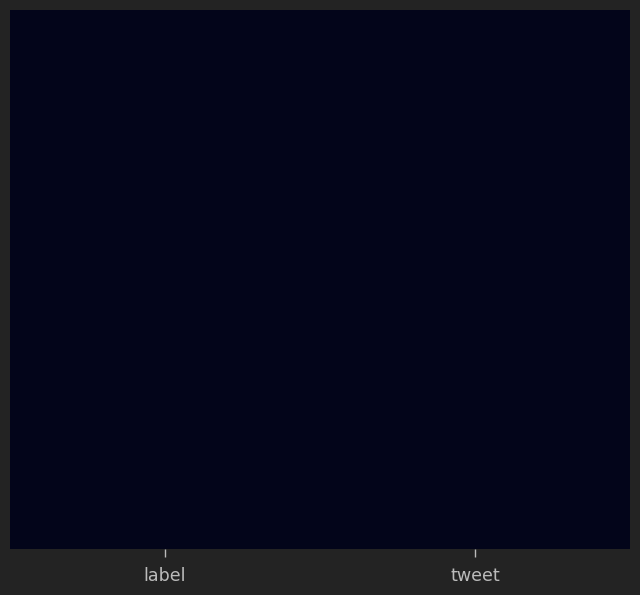

In [57]:
#since we got one homogenous color, we know we do not have any null values. 
sns.heatmap(twitter_df.isnull(), yticklabels=False, cbar=False)

<AxesSubplot:>

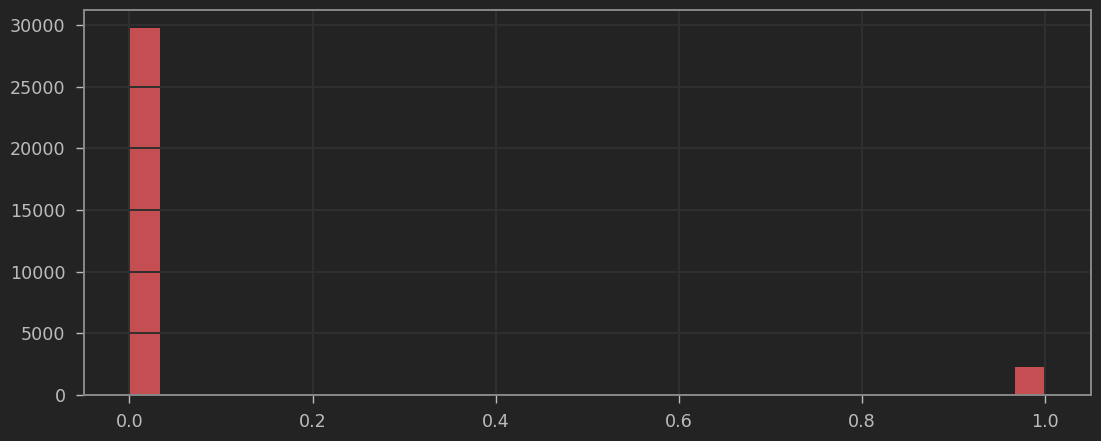

In [58]:
#plotting a histogram
#the results suggest we have an overwhelming amount of positive/neutral tweets
twitter_df['label'].hist(bins=30, figsize=(13,5), color='r')

/home/mitzu-panther/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

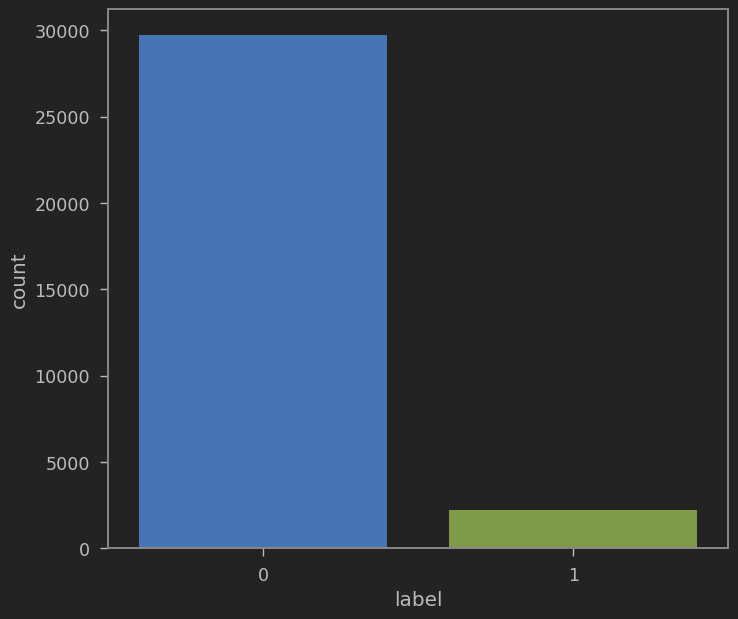

In [59]:
#same as above in seaborn
sns.countplot(twitter_df['label'], label='Count')

In [60]:
#adding a new column
twitter_df['length'] = twitter_df['tweet'].apply(len)
twitter_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [61]:
#lets view the shortest message
twitter_df[twitter_df['length']==11]

,label,tweet,length
25195,0,i love you,11


In [62]:
#viewing the tweets with the average number of characters (84)
twitter_df[twitter_df['length']==84]

,label,tweet,length
43,0,my mom shares the same bihday as @user bihda...,84
220,0,g o a l s ð repost from @user #propey #ocea...,84
640,0,oscar tabarez talks luis suarezâs angry reac...,84
723,0,@user another hands &amp; feet complete!! ber...,84
742,0,because great things never came from comfo zon...,84
...,...,...,...
31445,0,.@user on making choices to keep herself as ...,84
31448,0,i'm a gordo. #passpo #florence #firenze #italy...,84
31509,0,just 3 keys that are found on your computer to...,84
31857,0,traveling happy #family holidays #car #sunny...,84


<AxesSubplot:>

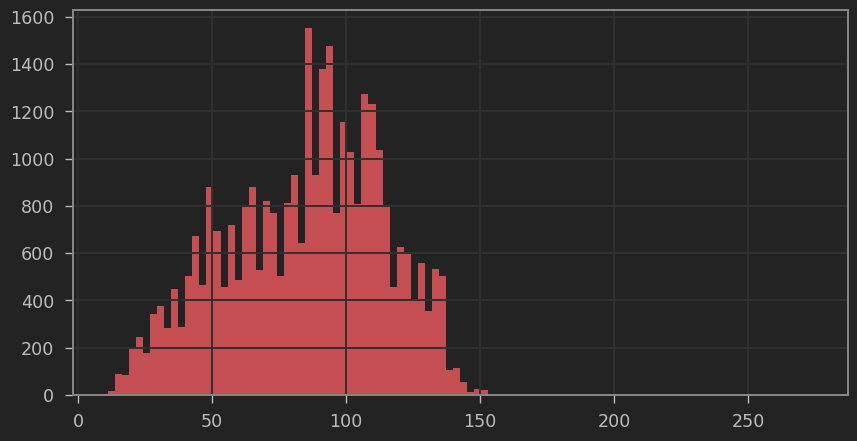

In [63]:
#histogram of the length column
twitter_df['length'].hist(bins=100, figsize=(10,5), color='r')

### Seperating tweets by positive or negative column
<p>We will then plot the word clouds for these new dataframes</p>

In [64]:
positive = twitter_df[twitter_df['label']==0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [65]:

negative = twitter_df[twitter_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [66]:
#combining all tweets in one string so that we can make a word cloud
sentences = twitter_df['tweet'].tolist()
len(sentences)

31962

In [67]:
sentences_as_one =' '.join(sentences)
#sentences_as_one
#printing that was way too long

In [68]:
#do not need to do this again
#!pip install wordcloud
from wordcloud import WordCloud

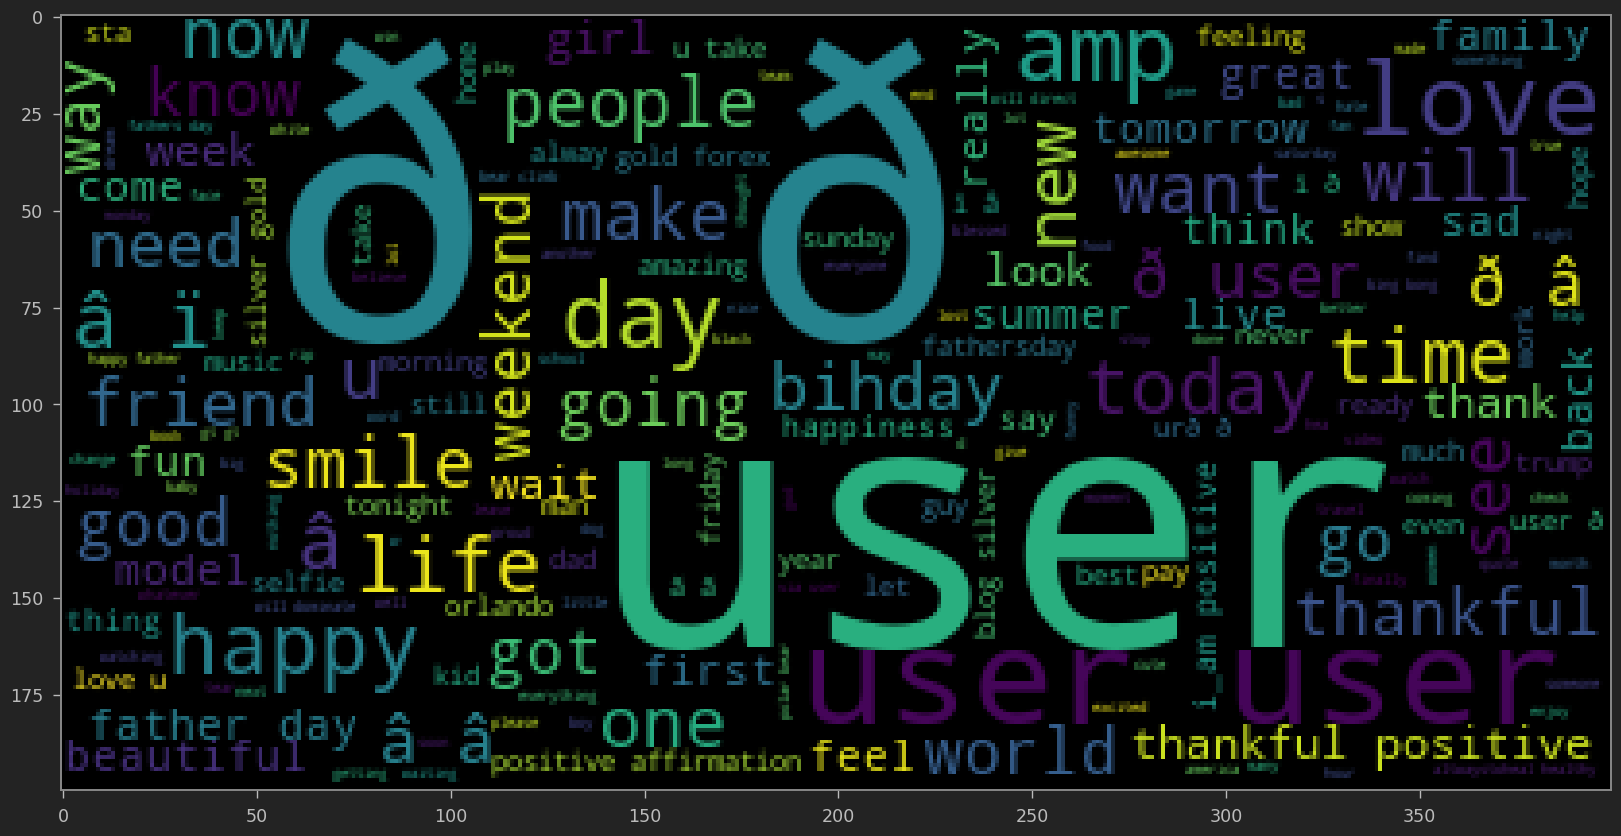

In [69]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one))